In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect('student_grades.db')
cursor = conn.cursor()

#create student table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS students (
        student_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT,
        last_name TEXT
    )
''')

#create grade table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS grades (
        grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INTEGER,
        subject TEXT,
        grade INTEGER,
        FOREIGN KEY(student_id) REFERENCES students(student_id)
    )
''')

conn.commit()


In [2]:
#insert student data
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]
cursor.executemany('INSERT INTO students (first_name, last_name) VALUES (?, ?)', students_data)

#insert grade data
grades_data = [
    (1, 'Math', 95), (1, 'English', 88), (1, 'History', 90),
    (2, 'Math', 82), (2, 'English', 76), (2, 'History', 85),
    (3, 'Math', 91), (3, 'English', 89), (3, 'History', 87),
    (4, 'Math', 78), (4, 'English', 85), (4, 'History', 80),
    (5, 'Math', 92), (5, 'English', 90), (5, 'History', 88)
]
cursor.executemany('INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)', grades_data)

conn.commit()


In [6]:
#retrieve student name/grades
cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
''')
all_students_grades = cursor.fetchall()

#average grade
cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) as avg_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
''')
average_grades = cursor.fetchall()

#highest grade
cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) as avg_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
    ORDER BY avg_grade DESC
    LIMIT 1
''')
top_student = cursor.fetchone()

#average grade for math
cursor.execute('''
    SELECT AVG(grade) FROM grades WHERE subject = "Math"
''')
math_avg_grade = cursor.fetchone()

#scored above 90
cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    WHERE grades.grade > 90
''')
above_90_students = cursor.fetchall()

print("All students and their grades:", all_students_grades)
print("Average grade for each student:", average_grades)
print("Student with the highest average grade:", top_student)
print("Average grade for Math:", math_avg_grade)
print("Students who scored above 90 in any subject:", above_90_students)


All students and their grades: [('Alice', 'Johnson', 'Math', 95), ('Alice', 'Johnson', 'English', 88), ('Alice', 'Johnson', 'History', 90), ('Bob', 'Smith', 'Math', 82), ('Bob', 'Smith', 'English', 76), ('Bob', 'Smith', 'History', 85), ('Carol', 'White', 'Math', 91), ('Carol', 'White', 'English', 89), ('Carol', 'White', 'History', 87), ('David', 'Brown', 'Math', 78), ('David', 'Brown', 'English', 85), ('David', 'Brown', 'History', 80), ('Eve', 'Davis', 'Math', 92), ('Eve', 'Davis', 'English', 90), ('Eve', 'Davis', 'History', 88)]
Average grade for each student: [('Alice', 'Johnson', 91.0), ('Bob', 'Smith', 81.0), ('Carol', 'White', 89.0), ('David', 'Brown', 81.0), ('Eve', 'Davis', 90.0)]
Student with the highest average grade: ('Alice', 'Johnson', 91.0)
Average grade for Math: (87.6,)
Students who scored above 90 in any subject: [('Alice', 'Johnson', 'Math', 95), ('Carol', 'White', 'Math', 91), ('Eve', 'Davis', 'Math', 92)]


In [7]:
#pandas
students_df = pd.read_sql_query('SELECT * FROM students', conn)
grades_df = pd.read_sql_query('SELECT * FROM grades', conn)

#join databases
merged_df = pd.read_sql_query('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
''', conn)


print(merged_df)


   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     91
7       Carol     White  English     89
8       Carol     White  History     87
9       David     Brown     Math     78
10      David     Brown  English     85
11      David     Brown  History     80
12        Eve     Davis     Math     92
13        Eve     Davis  English     90
14        Eve     Davis  History     88


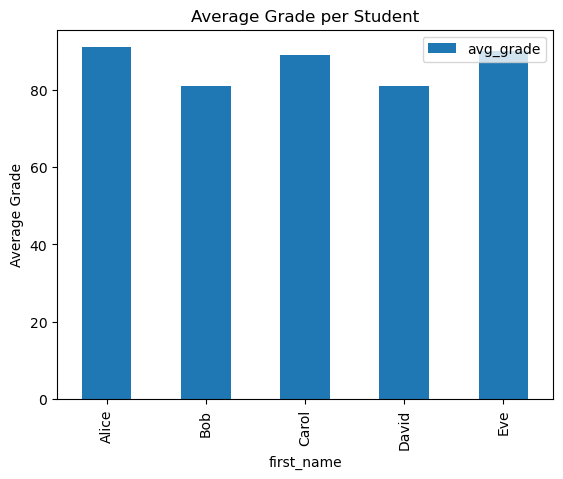

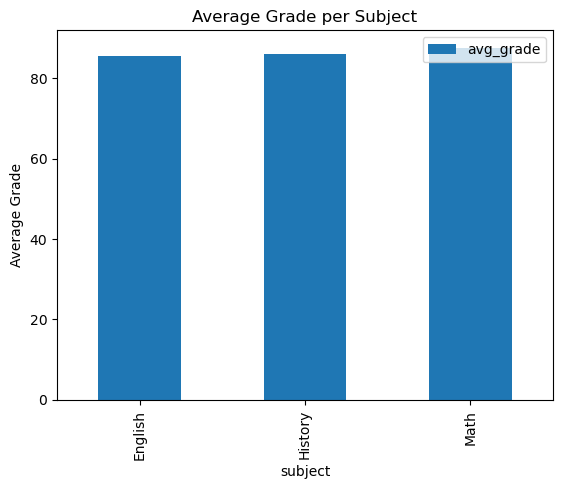

In [8]:
# Plot the average grades for each student
average_grades_df = pd.read_sql_query('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) as avg_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
''', conn)

average_grades_df.plot(x='first_name', y='avg_grade', kind='bar', title='Average Grade per Student')
plt.ylabel('Average Grade')
plt.show()

# Create a bar chart showing the average grade for each subject
average_subject_df = pd.read_sql_query('''
    SELECT subject, AVG(grade) as avg_grade
    FROM grades
    GROUP BY subject
''', conn)

average_subject_df.plot(x='subject', y='avg_grade', kind='bar', title='Average Grade per Subject')
plt.ylabel('Average Grade')
plt.show()
